# Load rsfMRI ROI time series, compute functional connectivity, and plot

## Setup

Define some variables

In [166]:
data_dir = '/external/rprshnas01/netdata_kcni/jglab/Data/BrainhackGlobalToronto_2019'


bs_data_dir = '/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/brainspace/datasets'

lhp_file = bs_data_dir + '/surfaces/conte69_32k_lh.gii'
rhp_file = bs_data_dir + '/surfaces/conte69_32k_rh.gii'


r1_fstr = data_dir + '/%s/%s_rfMRI_REST1_LR_MSMAll_2clean_schaefer_surf_meants.csv'


sch400_parc_file = bs_data_dir + '/parcellations/schaefer_400_conte69.csv'

Importage

In [143]:
import os,sys,glob,numpy as np,pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm

import seaborn as sns

import nibabel as nib
from nilearn.plotting import plot_anat,plot_surf,plot_surf_stat_map,plot_surf_roi

In [ ]:
bs_dir = '../../../../libraries_of_others/github/BrainSpace'
surf_dir = bs_dir + '/shared/surfaces'

# Generic imports
import os,sys,glob,numpy as np,pandas as pd

# Viz stuff
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Brainspace stuff
sys.path.append(bs_dir)
import brainspace
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres,plot_surf
from brainspace.datasets import load_group_fc, load_parcellation
from brainspace.gradient import GradientMaps

# Nipy stuff
from nilearn.plotting import plot_surf,plot_surf_stat_map,view_surf
import nibabel as nib

#from brainspace.plotting import 

from brainspace.utils.parcellation import map_to_labels

## Load the data

In [42]:
sub_dirs = glob.glob(data_dir + '/1*')

In [44]:
subs = [s.split('/')[-1] for s in sub_dirs]
np.array(subs)

array(['104416', '128632', '126325', '115219', '128935', '110613',
       '120414', '109830', '124624', '101006', '102008', '109325',
       '122822', '102715', '100307', '110411', '127327', '107321',
       '105923', '103515', '116524', '118730', '115825', '101309',
       '127226', '113619', '111312', '111716', '102614', '124220',
       '108020', '118528', '107422', '125222', '118023', '101107',
       '102109', '112516', '125424', '115320', '117324', '111211',
       '127832', '100610', '102311', '105115', '113316', '103010',
       '129028', '126426', '103111', '118124', '118831', '120111',
       '112112', '111514', '115017', '108828', '100408', '115724',
       '108525', '104820', '116726', '102513', '118932', '103414',
       '122317', '102816', '114924', '127731', '117021', '103818',
       '114621', '119126', '119025', '113215', '114419', '104012',
       '111413', '108222', '124422', '108121', '118225', '117930',
       '110007', '121618', '114823', '128026', '107725', '1050

In [45]:
glob.glob(sub_dirs[0] + '/*')

['/external/rprshnas01/netdata_kcni/jglab/Data/BrainhackGlobalToronto_2019/104416/104416_rfMRI_REST2_RL_MSMAll_2clean_schaefer_surf_meants.csv',
 '/external/rprshnas01/netdata_kcni/jglab/Data/BrainhackGlobalToronto_2019/104416/104416_rfMRI_REST2_LR_MSMAll_2clean_schaefer_surf_meants.csv',
 '/external/rprshnas01/netdata_kcni/jglab/Data/BrainhackGlobalToronto_2019/104416/104416_rfMRI_REST1_LR_MSMAll_2clean_schaefer_surf_meants.csv',
 '/external/rprshnas01/netdata_kcni/jglab/Data/BrainhackGlobalToronto_2019/104416/104416_rfMRI_REST1_RL_MSMAll_2clean_schaefer_surf_meants.csv']

In [155]:
r1_fs = {sub: r1_fstr %(sub,sub) for sub in subs}

In [83]:
r1_dfs = {sub: pd.read_csv(f,header=None) for sub,f in r1_fs.items()}

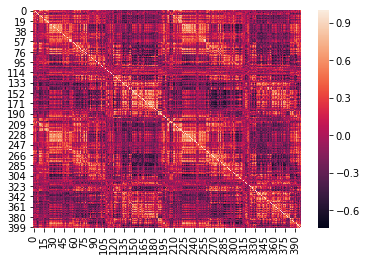

In [33]:
sub = subs[0]
df = r1_dfs[sub]
sns.heatmap(df.T.corr())

In [84]:
r1_cms = {sub: df.T.corr() for sub,df in r1_dfs.items()}
r1_cms_cat = pd.concat(r1_cms)
r1_cms_cat.index.names = ['sub', 'row']
r1_cms_cat.columns.names = ['col']

In [94]:
r1_cms_mn = r1_cms_cat.stack('col').unstack('sub').mean(axis=1).unstack('col')

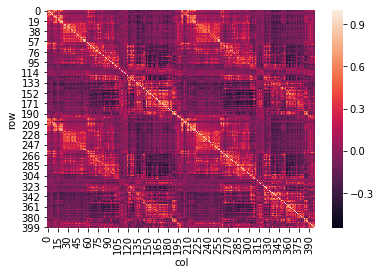

In [95]:
sns.heatmap(r1_cms_mn)

## Plot on a brain

In [165]:
lhp_img = nib.load(lhp_file)
lhp_vtx = lhp_img.darrays[0].data
lhp_tri = lhp_img.darrays[1].data

rhp_img = nib.load(rhp_file)
rhp_vtx = rhp_img.darrays[0].data
rhp_tri = rhp_img.darrays[1].data

lrhp_vtx = np.concatenate([lhp_vtx,rhp_vtx],axis=0)
lrhp_tri = np.concatenate([lhp_tri,rhp_tri+lhp_vtx.shape[0]],axis=0)

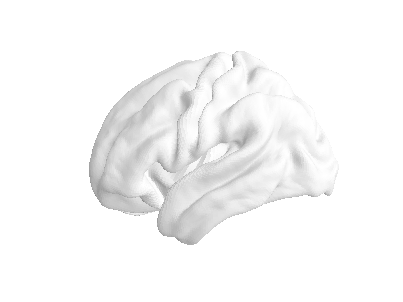

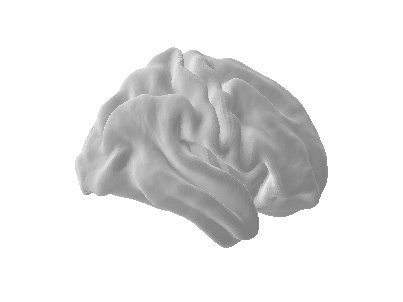

In [170]:
disp = plot_surf([lrhp_vtx,lrhp_tri],hemi='left', view='lateral');

disp = plot_surf([lrhp_vtx,lrhp_tri],hemi='right', view='lateral');

In [185]:
sch400_parc = np.loadtxt(sch400_parc_file).astype(int)-1

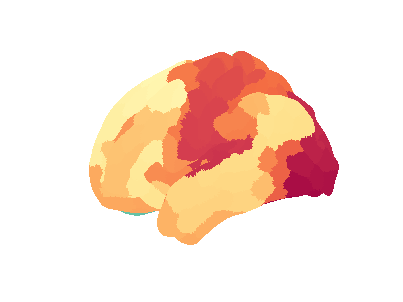

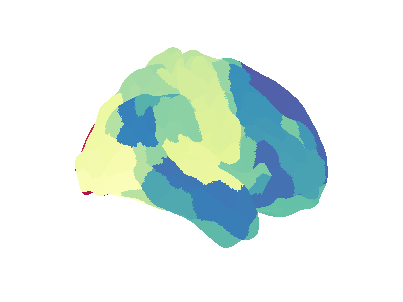

In [280]:
disp = plot_surf_roi([lrhp_vtx,lrhp_tri],sch400_parc,cmap=cm.Spectral,hemi='left',view='lateral',vmin=0,vmax=400);
disp = plot_surf_roi([lrhp_vtx,lrhp_tri],sch400_parc,cmap=cm.Spectral,hemi='left',view='medial',vmin=0,vmax=400);

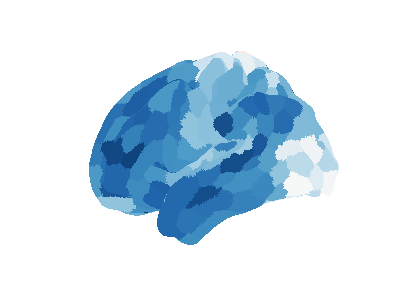

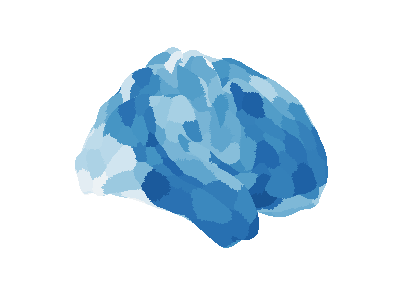

In [196]:
mat = r1_cms[sub].values[:,0][sch400_parc].copy()
disp = plot_surf_roi([lrhp_vtx,lrhp_tri],mat,cmap='RdBu_r',hemi='left', view='lateral',vmin=-1);
disp = plot_surf_roi([lrhp_vtx,lrhp_tri],mat,cmap='RdBu_r',hemi='left', view='medial',vmax=1);

Compare to the brainspace plotting approach

In [286]:
sch400_parc_2 = load_parcellation('schaefer', scale=400, join=True)

In [288]:
sch400_parc_2_dat = np.unique(sch400_parc_2)
sch400_parc_2_dat.shape

(401,)

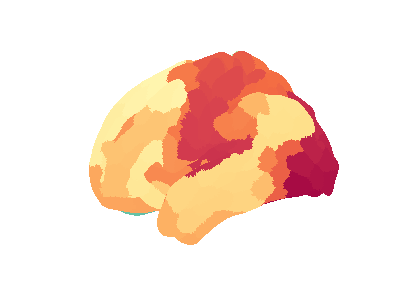

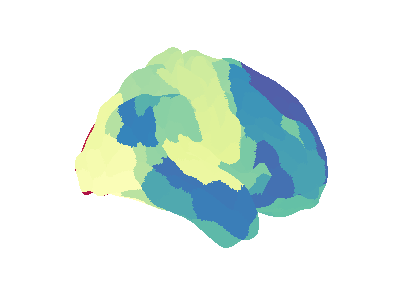

In [292]:
surfdat = map_to_labels(sch400_parc_2_dat.astype(float),
                        sch400_parc_2.astype(float), mask=sch400_parc_2 != 0,fill=np.nan)
surfdat[np.isnan(surfdat)] = 0.

disp = plot_surf_roi([lrhp_vtx,lrhp_tri],surfdat,cmap=cm.Spectral,hemi='left', view='lateral',vmin=-1);
disp = plot_surf_roi([lrhp_vtx,lrhp_tri],surfdat,cmap=cm.Spectral,hemi='left', view='medial',vmax=1);

In [ ]:
surfdat = map_to_labels(sch400_parc_2_dat.astype(float),
                        sch400_parc_2.astype(float), mask=sch400_parc_2 != 0,fill=np.nan)
surfdat[np.isnan(surfdat)] = 0.

disp = plot_surf_roi([lrhp_vtx,lrhp_tri],surfdat,cmap=cm.Spectral,hemi='left', view='lateral',vmin=-1);
disp = plot_surf_roi([lrhp_vtx,lrhp_tri],surfdat,cmap=cm.Spectral,hemi='left', view='medial',vmax=1);

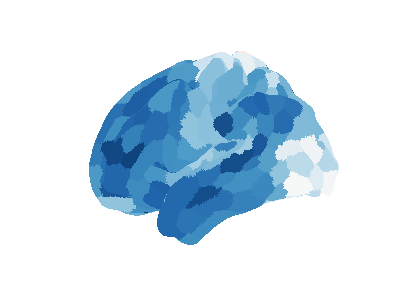

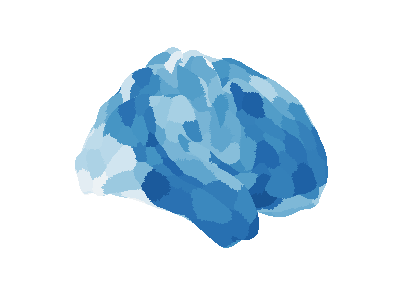

In [284]:
surfdat = map_to_labels(r1_cms[sub].values[:,0],
                        sch400_parc_2, mask=sch400_parc_2 != 0,fill=np.nan)
surfdat[np.isnan(surfdat)] = 0.

disp = plot_surf_roi([lrhp_vtx,lrhp_tri],surfdat,cmap='RdBu_r',hemi='left', view='lateral',vmin=-1);
disp = plot_surf_roi([lrhp_vtx,lrhp_tri],surfdat,cmap='RdBu_r',hemi='left', view='medial',vmax=1);

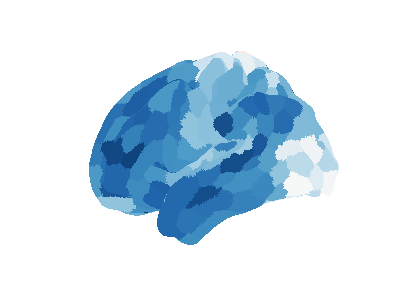

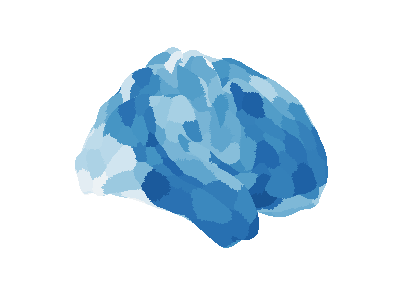

In [277]:
surfdat = map_to_labels(r1_cms[sub].values[:,0],
                        sch400_parc_2, mask=sch400_parc_2 != 0,fill=np.nan)
surfdat[np.isnan(surfdat)] = 0.

disp = plot_surf_roi([lrhp_vtx,lrhp_tri],surfdat,cmap='RdBu_r',hemi='left', view='lateral',vmin=-1);
disp = plot_surf_roi([lrhp_vtx,lrhp_tri],surfdat`,cmap='RdBu_r',hemi='left', view='medial',vmax=1);

Looks close enough.

## Save FC matrices to file

In [ ]:
r1_cms_cat.to_pickle('../data/hcp_r1_cms_cat.pkl')

In [ ]:
r1_cms_cat.to_hdf('../data/hcp_cms.hdf', 'r1_cms_cat')

In [ ]:
test = pd.read_pickle('../data/hcp_r1_cms_cat.pkl')

In [205]:
test = pd.read_hdf('../data/hcp_cms.hdf', 'r1_cms_cat')